___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which is used for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using several Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, and Scipy. You will first clean and analyze the dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 1 `( Data Cleaning )`

In [1]:
# importing the relevant python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)

In [2]:
df = pd.read_json('scout_car.json', lines=True)

In [3]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df.columns)

54

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [6]:
df.shape

(15919, 54)

### 1 - url

In [7]:
df.url.value_counts()[:10]

https://www.autoscout24.com//offers/opel-insignia-st-innovation-led-parkpilot-navi-diesel-black-7e42e4f9-b70b-45b2-8765-1987bb48b47d              1
https://www.autoscout24.com//offers/opel-corsa-1-2-ecotec-cool-sound-gasoline-white-feb588f4-c01a-48d7-bd5e-947d11b45d54                          1
https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tfsi-klima-gasoline-white-61b05392-8338-40cb-ae7e-8ee7a0650bb2                          1
https://www.autoscout24.com//offers/renault-espace-renault-initiale-blue-dci-200ps-diesel-black-4d73bdde-fe55-4647-85f9-1ca2c637f9bc              1
https://www.autoscout24.com//offers/opel-corsa-1-4-turbo-s-s-edt-3tuer-pdc-sitzh-allwetter-gasoline-white-5ac94ee9-cf9e-4bf2-bc98-60a8e5247500    1
https://www.autoscout24.com//offers/audi-a3-sportback-1-0-tfsi-naviplus-gra-shz-gasoline-silver-632b314b-fdb0-43a3-a09c-60fc75dbbc0b              1
https://www.autoscout24.com//offers/opel-insignia-innovation-1-5t-140pk-nieuw-gasoline-black-54dc33f1-abcf-4b55-

In [8]:
df.url.isnull().sum()

0

In [9]:
df.drop('url', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 2 - make_model

In [10]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [11]:
df.make_model.isnull().sum()

0

In [12]:
# df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['make_model'])
# This method automatically deletes the original column.

In [13]:
# # Another method
# df_dummied = pd.get_dummies(df.make_model, prefix='', prefix_sep='', columns=['car_make_model'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

In [14]:
df.shape

(15919, 53)

<div class="alert alert-block alert-success">
<p>The dummied columns should be included in the analysis.</p></div>

### 3 - short_description

In [15]:
df.short_description.value_counts(dropna=False)[:10]

SPB 1.6 TDI 116 CV S tronic Sport                64
NaN                                              46
1.4 66kW (90CV) Selective                        40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH            38
SPB 30 TDI S tronic Business                     35
SPB 30 TFSI S tronic Admired                     35
Sporter 1.5 dCi 90CV Zen , NAVI - AZIENDALE      32
dCi 75 Business Energy eco2 Euro6 55 kW (75 C    31
1.2 5 porte b-Color                              30
dCi 160CV EDC Energy Intens                      30
Name: short_description, dtype: int64

In [16]:
df.drop('short_description', axis=1, inplace=True)

In [17]:
df.shape

(15919, 52)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 4 - body_type

In [18]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [19]:
df.groupby('make_model').body_type.value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [20]:
for model in df['make_model'].unique():
    cond = df['make_model']==model
    mode = list(df[cond]['body_type'].mode())
    if mode != []:
        df.loc[cond, 'body_type'] = df.loc[cond, 'body_type'].fillna(df[cond]['body_type'].mode()[0])
    else:
        df.loc[cond, 'body_type'] = df.loc[cond, 'body_type'].fillna(df['body_type'].mode()[0])

In [21]:
df.body_type.value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [22]:
df.groupby('make_model').body_type.value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2605
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                Coupe               4
Opel Astra      Station wagon    1218
                Sedans           1053
                Compact           185
                Other              67
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1232
                Sedans            875
                Other              87
                Coupe              13
                Transporter         7
                Off-Road            3
                Van 

In [23]:
# df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['body_type'])
# This method automatically deletes the original column.

In [24]:
# df_dummied = pd.get_dummies(df.body_type, prefix='', prefix_sep='', columns=['car_body_type'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

In [25]:
df.shape

(15919, 52)

<div class="alert alert-block alert-success">
<p>The dummied columns should be included in the anlaysis.</p></div>

### 5 - Price

In [26]:
df.price.value_counts(dropna=False).sort_index()[:10]

13      1
120     1
255     1
331     1
4950    1
4990    1
5250    1
5300    1
5445    1
5450    1
Name: price, dtype: int64

In [27]:
df.price.isnull().sum()

0

In [28]:
### Handling Outliers
# Using Winsorize

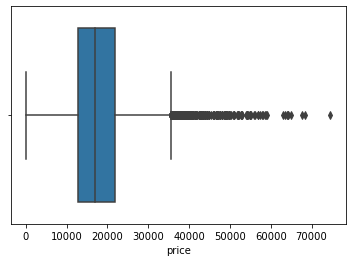

In [29]:
sns.boxplot(df.price);

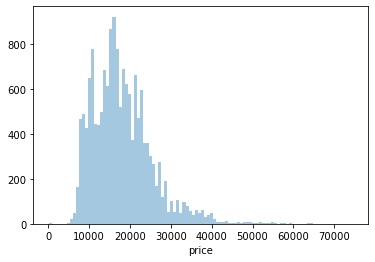

In [30]:
sns.distplot(df.price, kde=False, bins=100);

In [31]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [32]:
stats.iqr(df.price)

9050.0

In [33]:
lower = df.price.quantile(0.25)

In [34]:
upper = df.price.quantile(0.75)

In [35]:
iqr = upper - lower
iqr

9050.0

In [36]:
upp_lim = upper + iqr
upp_lim

30950.0

In [37]:
low_lim = lower - iqr
low_lim

3800.0

In [38]:
df[df.price > upp_lim].price.count()

917

In [39]:
df[df.price < low_lim].price.count()

4

In [40]:
df.price.quantile(0.0004)

5268.360000000001

In [41]:
df.price.quantile(0.98)

37841.19999999995

In [42]:
df_price_win = winsorize(df.price, (0.0004, 0.02))

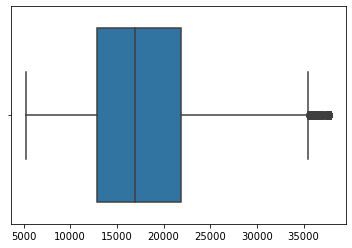

In [43]:
sns.boxplot(df_price_win);

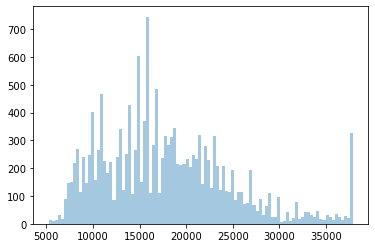

In [44]:
sns.distplot(df_price_win, kde=False, bins=100);

In [45]:
df_price_win = pd.Series(df_price_win)

In [46]:
df_price_win.describe()

count    15919.000000
mean     17909.692380
std       6971.465493
min       5250.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      37870.000000
dtype: float64

In [47]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [48]:
df['price_winsorize'] = df_price_win

In [49]:
#########################################

In [50]:
# Using Log Transformation

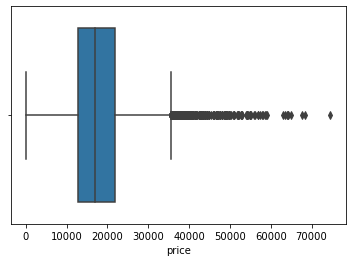

In [51]:
sns.boxplot(df.price);

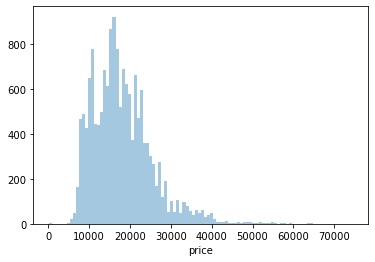

In [52]:
sns.distplot(df.price, kde=False, bins=100);

In [53]:
price_logged = np.log(df.price)

<AxesSubplot:xlabel='price'>

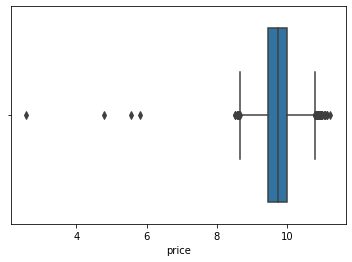

In [54]:
sns.boxplot(price_logged)

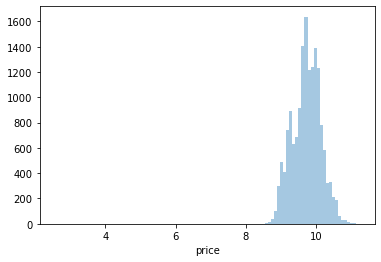

In [55]:
sns.distplot(price_logged, kde=False, bins=100);

In [56]:
df['price_logged'] = price_logged

<div class="alert alert-block alert-success">
<p>The target label.</p></div>

### 6 - vat

In [57]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [58]:
df.vat.isnull().sum()/len(df)

0.28349770714240846

In [59]:
df.groupby(['make_model']).vat.value_counts(dropna=False)

make_model      vat             
Audi A1         VAT deductible      1774
                NaN                  759
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      2209
                NaN                  787
                Price negotiable     101
Opel Astra      VAT deductible      1828
                NaN                  653
                Price negotiable      45
Opel Corsa      VAT deductible      1607
                NaN                  571
                Price negotiable      41
Opel Insignia   VAT deductible      1980
                NaN                  568
                Price negotiable      50
Renault Clio    VAT deductible       984
                NaN                  781
                Price negotiable      74
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       581
                NaN                  376
                Price ne

In [60]:
df['dm_vat'] = df.vat

In [61]:
for model in df['make_model'].unique():
    cond = df['make_model']==model
    df.loc[cond, 'dm_vat'] = df.loc[cond, 'dm_vat'].fillna(method='ffill').fillna(method='bfill')

In [62]:
df.dm_vat.value_counts(dropna=False)

VAT deductible      15048
Price negotiable      871
Name: dm_vat, dtype: int64

In [63]:
# df_dummied = pd.get_dummies(df.dm_vat, prefix='', prefix_sep='', columns=['vatt'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

In [64]:
df.shape

(15919, 55)

<div class="alert alert-block alert-success">
<p>The dummied columns should be included in the analysis.</p></div>

### 7 - km

In [65]:
df.km.value_counts(dropna=False).sort_index()[:10]

- km        1024
0 km          19
1 km         367
1,000 km      46
1,001 km       4
1,010 km       1
1,013 km       2
1,015 km       1
1,020 km       2
1,025 km       1
Name: km, dtype: int64

In [66]:
df.km.isnull().sum()

0

In [67]:
df.km.dtypes

dtype('O')

In [68]:
df['dm_km'] = df.km.astype(str)

In [69]:
df['dm_km'] = df['dm_km'].str.extract('(\S+)\skm$')

In [70]:
df.dm_km.value_counts(dropna=False).sort_index()[:10]

-        1024
0          19
1         367
1,000      46
1,001       4
1,010       1
1,013       2
1,015       1
1,020       2
1,025       1
Name: dm_km, dtype: int64

In [71]:
df.dm_km.replace({'-':'1', '0':'1'}, inplace=True)

In [72]:
df.dm_km.value_counts(dropna=False).sort_index()[:10]

1        1410
1,000      46
1,001       4
1,010       1
1,013       2
1,015       1
1,020       2
1,025       1
1,031       1
1,032       1
Name: dm_km, dtype: int64

In [73]:
def convert(x):
    return float(''.join(x.split(',')))

In [74]:
df.dm_km = df.dm_km.apply(convert)

In [75]:
df.dm_km.value_counts(dropna=False).sort_index(ascending=False)

317000.0       1
291800.0       1
260000.0       1
248000.0       1
240000.0       1
            ... 
5.0          170
4.0           15
3.0           33
2.0            6
1.0         1410
Name: dm_km, Length: 6688, dtype: int64

In [76]:
df.dm_km.isnull().sum()

0

In [77]:
df.dm_km.describe()

count     15919.000000
mean      31934.750738
std       37089.085294
min           1.000000
25%        1557.500000
50%       20400.000000
75%       46898.500000
max      317000.000000
Name: dm_km, dtype: float64

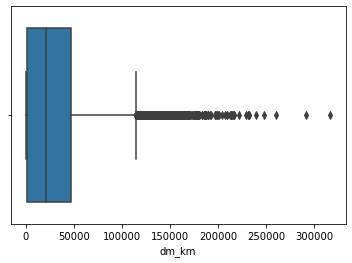

In [78]:
sns.boxplot(df.dm_km);

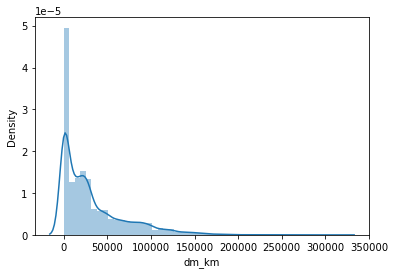

In [79]:
sns.distplot(df.dm_km);

In [80]:
### Handling Outliers
# Log Transformation

In [81]:
df['km_logged'] = np.log(df.dm_km)

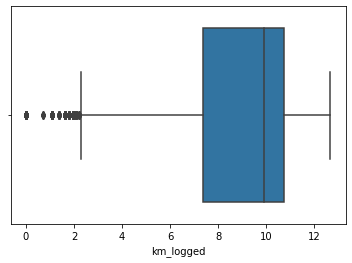

In [82]:
sns.boxplot(df.km_logged);

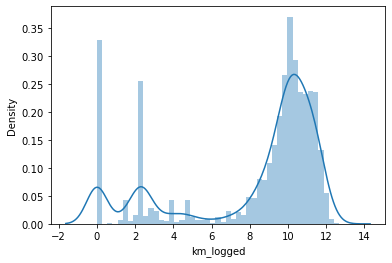

In [83]:
sns.distplot(df.km_logged);

In [84]:
df.km_logged.value_counts(dropna=False).sort_index()[:10]

0.000000    1410
0.693147       6
1.098612      33
1.386294      15
1.609438     170
            ... 
9.998843       1
9.999207       1
9.999388       1
9.999525       1
9.999661       1
Name: km_logged, Length: 2420, dtype: int64

In [85]:
df.shape

(15919, 57)

<div class="alert alert-block alert-danger">
<p>Consider creating groups for the km variable.</p></div>

### 8 - registration

In [86]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
12/2019       1
11/2019       1
08/2019       1
Name: registration, dtype: int64

In [87]:
df['dm_registration'] = df.registration

In [88]:
cond = (df.dm_registration == '-/-') & (df.dm_km < 15000)
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2019'})

In [89]:
df.dm_registration.value_counts(dropna=False)

01/2019    2125
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
-/-          13
07/2019       6
09/2019       5
12/2019       1
11/2019       1
08/2019       1
Name: dm_registration, dtype: int64

In [90]:
df[df.dm_registration == '-/-'].dm_km.value_counts()

39962.0    2
22627.0    2
89982.0    1
89692.0    1
34164.0    1
85000.0    1
68485.0    1
19500.0    1
20768.0    1
81800.0    1
32084.0    1
Name: dm_km, dtype: int64

In [91]:
cond = (df.dm_registration == '-/-') & (df.dm_km < 40000)
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2018'})

In [92]:
df[df.dm_registration == '-/-'].dm_km.value_counts()

89982.0    1
68485.0    1
89692.0    1
81800.0    1
85000.0    1
Name: dm_km, dtype: int64

In [93]:
cond = df.dm_registration == '-/-'
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2016'})

In [94]:
df.dm_registration.value_counts(dropna=False)

01/2019    2125
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     519
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
01/2016     381
04/2017     380
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
12/2019       1
11/2019       1
08/2019       1
Name: dm_registration, dtype: int64

In [95]:
df.dm_registration = df.dm_registration.str.split('/').str[1]

In [96]:
df.dm_registration.value_counts(dropna=False)

2018    4530
2019    4437
2016    3679
2017    3273
Name: dm_registration, dtype: int64

In [97]:
df.dm_registration.dtypes

dtype('O')

In [98]:
df.dm_registration = df.dm_registration.astype('float')

In [99]:
df.dm_registration = 2019 - df.dm_registration

In [100]:
df.dm_registration.value_counts(dropna=False)

1.0    4530
0.0    4437
3.0    3679
2.0    3273
Name: dm_registration, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

In [101]:
df.shape

(15919, 58)

### 9 - prev_owner

In [102]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [103]:
df['dm_prev_owner'] = df.prev_owner

In [104]:
df.groupby('dm_registration').dm_prev_owner.value_counts(dropna=False)

dm_registration  dm_prev_owner    
0.0              NaN                  2839
                 1 previous owner     1588
                 2 previous owners      10
1.0              1 previous owner     2967
                 NaN                  1488
                 2 previous owners      75
2.0              1 previous owner     1711
                 NaN                  1258
                 2 previous owners     296
                 3 previous owners       7
                 4 previous owners       1
3.0              1 previous owner     2028
                 NaN                  1243
                 2 previous owners     397
                 3 previous owners      10
                 4 previous owners       1
Name: dm_prev_owner, dtype: int64

In [105]:
lst = df.dm_registration.unique()
for i in lst:
    cond = df.dm_registration == i
    df.loc[cond, 'dm_prev_owner'] = df.loc[cond, 'dm_prev_owner'].fillna(method='ffill').fillna(method='bfill')

In [106]:
df.groupby('dm_registration').dm_prev_owner.value_counts(dropna=False)

dm_registration  dm_prev_owner    
0.0              1 previous owner     4418
                 2 previous owners      19
1.0              1 previous owner     4415
                 2 previous owners     115
2.0              1 previous owner     2795
                 2 previous owners     464
                 3 previous owners      13
                 4 previous owners       1
3.0              1 previous owner     3075
                 2 previous owners     587
                 3 previous owners      16
                 4 previous owners       1
Name: dm_prev_owner, dtype: int64

In [107]:
df.dm_prev_owner.isnull().sum()

0

In [108]:
df.dm_prev_owner.value_counts()

1 previous owner     14703
2 previous owners     1185
3 previous owners       29
4 previous owners        2
Name: dm_prev_owner, dtype: int64

In [109]:
df.dm_prev_owner = df.dm_prev_owner.str.extract('([0-9]+)').astype('float64')

In [110]:
df.dm_prev_owner.value_counts()

1.0    14703
2.0     1185
3.0       29
4.0        2
Name: dm_prev_owner, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 10 - kW

In [111]:
df.kW.value_counts(dropna=False)

NaN    15919
Name: kW, dtype: int64

In [112]:
df.drop('kW', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 11 - hp

In [113]:
df.hp.value_counts(dropna=False).sort_index()

- kW        88
1 kW        20
100 kW    1308
101 kW      47
103 kW     253
104 kW       8
110 kW    1112
112 kW       7
115 kW       1
117 kW       6
118 kW     516
119 kW      30
120 kW       8
121 kW     392
122 kW      35
123 kW       1
125 kW     707
127 kW       2
132 kW       1
133 kW       1
135 kW      24
137 kW       1
140 kW       2
141 kW      16
143 kW       2
146 kW      18
147 kW     380
149 kW       3
150 kW       2
154 kW      39
155 kW       6
162 kW      98
163 kW       1
164 kW      27
165 kW     194
167 kW       2
168 kW       3
184 kW       5
191 kW       7
195 kW       1
228 kW       2
239 kW       1
270 kW       2
294 kW      18
4 kW         1
40 kW        2
44 kW        1
51 kW      695
52 kW       22
53 kW        2
54 kW      276
55 kW      569
56 kW      286
57 kW       10
60 kW      160
63 kW        2
65 kW        4
66 kW     2122
67 kW       40
70 kW      888
71 kW       59
74 kW       81
75 kW        1
76 kW        4
77 kW      345
78 kW       20
80 kW     

In [114]:
df['dm_hp'] = df.hp

In [115]:
df[df.dm_hp == '- kW'].make_model.value_counts()

Renault Espace    34
Renault Clio      29
Opel Insignia     10
Renault Duster     8
Opel Corsa         2
Audi A1            2
Opel Astra         2
Audi A3            1
Name: make_model, dtype: int64

In [116]:
lst = df.make_model.unique()
for i in lst:
    cond = (df.make_model == i)
    df.loc[cond, 'dm_hp'] = df.loc[cond, 'dm_hp'].replace(to_replace='\S+\s\S+', 
                                                          value=df[df.make_model == i].dm_hp.mode()[0], regex=True)

In [117]:
df.dm_hp.value_counts(dropna=False).sort_index()

100 kW    2598
110 kW    2526
118 kW     991
55 kW     1839
66 kW     2219
77 kW       34
85 kW     5712
Name: dm_hp, dtype: int64

In [118]:
df.dm_hp = df.dm_hp.str.extract('(\S+)\skW$').astype('float64')

In [119]:
df.dm_hp.value_counts(dropna=False).sort_index()

55.0     1839
66.0     2219
77.0       34
85.0     5712
100.0    2598
110.0    2526
118.0     991
Name: dm_hp, dtype: int64

In [120]:
#####################
#####################

In [121]:
df['dm_hp2'] = df.hp

In [122]:
lst = df.make_model.unique()
for i in lst:
    cond = (df.make_model == i) & (df.dm_hp2 == '- kW')
    df.loc[cond, 'dm_hp2'] = df.loc[cond, 'dm_hp2'].replace(to_replace='- kW', 
                                                          value=df[df.make_model == i].dm_hp2.mode()[0])

In [123]:
df.dm_hp2 = df.dm_hp2.str.extract('(\S+)\skW$').astype('float64')

In [124]:
df.dm_hp2.isnull().sum()

0

In [125]:
lst = df.make_model.unique()
for i in lst:
    cond = (df.make_model == i) & ((df.dm_hp2 < 51) | (df.dm_hp2 > 165))
    df.loc[cond, 'dm_hp2'] = df.loc[cond, 'dm_hp2'].replace(to_replace=df.loc[cond,'dm_hp2'].values, 
                                                          value=df[df.make_model == i].dm_hp2.mode()[0])

In [126]:
df.dm_hp2.value_counts().sort_index()

51.0      695
52.0       22
53.0        2
54.0      276
55.0      600
56.0      286
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2133
67.0       40
70.0      888
71.0       59
74.0       81
75.0        1
76.0        4
77.0      353
78.0       20
80.0        3
81.0     1402
82.0       22
84.0        1
85.0     2568
86.0        2
87.0      232
88.0      177
89.0        2
90.0        4
92.0      466
93.0        3
96.0       72
98.0        3
100.0    1336
101.0      47
103.0     253
104.0       8
110.0    1121
112.0       7
115.0       1
117.0       6
118.0     557
119.0      30
120.0       8
121.0     392
122.0      35
123.0       1
125.0     707
127.0       2
132.0       1
133.0       1
135.0      24
137.0       1
140.0       2
141.0      16
143.0       2
146.0      18
147.0     380
149.0       3
150.0       2
154.0      39
155.0       6
162.0      98
163.0       1
164.0      27
165.0     194
Name: dm_hp2, dtype: int64

<div class="alert alert-block alert-info">
<p>There are two columns created for the hp column. One of the should be included in the analysis. If the second one is going to be used, then I should consider grouping the values into categories.</p></div>

### 12 - Type

In [127]:
df.Type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [128]:
df.Type.isnull().sum()

2

In [129]:
df.Type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [130]:
df['dm_type'] = df.Type

In [131]:
def convert(x):
    x = str(x)
    y = re.findall('New|Used|Pre-registered|Employee|Demonstration', x)
    if y != []:
        
        if y[0] == 'New':
            return 'New'
        elif y[0] == 'Used':
            return 'Used'
        elif y[0] == 'Pre-registered':
            return 'Pre-registered'
        elif y[0] == 'Employee':
            return "Employee's car"
        elif y[0] == 'Demonstration':
            return 'Demonstration'

In [132]:
df.dm_type = df.dm_type.apply(convert)

In [133]:
df.dm_type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: dm_type, dtype: int64

In [134]:
df.dm_type = df.dm_type.fillna(method='ffill')

In [135]:
df.dm_type.value_counts(dropna=False)

Used              11097
New                1650
Pre-registered     1365
Employee's car     1011
Demonstration       796
Name: dm_type, dtype: int64

In [136]:
# df_dummied = pd.get_dummies(df.dm_type, prefix='type_', prefix_sep='', columns=['Type'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

In [137]:
df.shape

(15919, 61)

<div class="alert alert-block alert-success">
<p>The dummied columns should be included in the analysis.</p></div>

### 13 - Previous Owners

In [138]:
df['Previous Owners'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n96 g CO2/km (comb)\n]                                                                 1
[\n1\n, \n181 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.9 l/100 km (city), \n, 4.8 l/100 km (country), \n]       1
[\n1\n, \n, 6.7 l/100 km (comb), \n, 8.6 l/100 km (city), \n, 5.6 l/100 km (country), \n]       1
[\n1\n, \n102 g CO2/

In [139]:
df['dm_previous_owners'] = df['Previous Owners']

In [140]:
import re
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall("([0-9]+)", x)
        return float(y[0])
    else:
        return np.nan

In [141]:
df.dm_previous_owners = df.dm_previous_owners.apply(convert)

In [142]:
df.dm_previous_owners.value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: dm_previous_owners, dtype: int64

In [143]:
df.dm_registration.value_counts()

1.0    4530
0.0    4437
3.0    3679
2.0    3273
Name: dm_registration, dtype: int64

In [144]:
df.groupby('dm_registration').dm_previous_owners.value_counts(dropna=False)

dm_registration  dm_previous_owners
0.0              NaN                   2675
                 1.0                   1588
                 0.0                    164
                 2.0                     10
1.0              1.0                   2967
                 NaN                   1480
                 2.0                     75
                 0.0                      8
2.0              1.0                   1711
                 NaN                   1252
                 2.0                    296
                 3.0                      7
                 0.0                      6
                 4.0                      1
3.0              1.0                   2028
                 NaN                   1233
                 2.0                    397
                 0.0                     10
                 3.0                     10
                 4.0                      1
Name: dm_previous_owners, dtype: int64

In [145]:
df.groupby('make_model').dm_previous_owners.value_counts(dropna=False)

make_model      dm_previous_owners
Audi A1         1.0                   1331
                NaN                   1058
                2.0                    171
                0.0                     51
                3.0                      2
                4.0                      1
Audi A2         1.0                      1
Audi A3         NaN                   1483
                1.0                   1446
                2.0                    111
                0.0                     55
                3.0                      2
Opel Astra      1.0                   1487
                NaN                    889
                2.0                    134
                0.0                     13
                3.0                      3
Opel Corsa      1.0                   1326
                NaN                    734
                2.0                    138
                0.0                     19
                3.0                      2
Opel Insignia   1.0

In [146]:
lst1 = df.make_model.unique()
lst2 = df.dm_registration.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.dm_registration == j)
        df.loc[cond, 'dm_previous_owners'] = df.loc[cond, 
                                'dm_previous_owners'].fillna(method='ffill').fillna(method='bfill')

In [147]:
df.dm_previous_owners.value_counts(dropna=False)

1.0    14156
2.0     1169
0.0      563
3.0       29
4.0        2
Name: dm_previous_owners, dtype: int64

In [148]:
df.dm_prev_owner.value_counts(dropna=False)

1.0    14703
2.0     1185
3.0       29
4.0        2
Name: dm_prev_owner, dtype: int64

<div class="alert alert-block alert-info">
<p>The dm_previous_owners and dm_prev_owner columns are very similar to each other. One of them should be used in the analysis.</p></div>

### 14 - Next Inspection

In [149]:
df['Next Inspection'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n10/2018\n, \n4 (Green)\n]                  1
[\n11/2021\n, \n149 g CO2/km (comb)\n]        1
[\n04/2020\n, \n116 g CO2/km (comb)\n]        1
[\n04/2021\n, \n103 g CO2/km (comb)\n]        1
[\n11/2021\n, \n111 g CO2/km (comb)\n]        1
Name: Next Inspection, Length: 1400, dtype: int64

In [150]:
df['dm_next_ins'] = df['Next Inspection']

In [151]:
import re
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall("([0-9]+/[0-9]+)", x)
        return y[0].split('/')[1]
    else:
        return np.nan

In [152]:
df.dm_next_ins = df.dm_next_ins.apply(convert)

In [153]:
df.dm_next_ins.value_counts(dropna=False)

NaN     12384
2021     1601
2020      694
2022      688
2019      438
2023       47
2018       38
2017       13
2016        6
2001        5
1955        1
1999        1
2024        1
2014        1
1921        1
Name: dm_next_ins, dtype: int64

In [154]:
df.dm_next_ins.isnull().sum() / len(df.dm_next_ins)

0.7779383127080847

In [155]:
df.drop(['Next Inspection', 'dm_next_ins'], axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Too many null values. There are some outlier and absurd values. Also, this column does not seem to be related to the target label.</p></div>

### 15 - Inspection new

In [156]:
df['Inspection new'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]        1
[\nYes\n, \n, 6.3 l/100 km (comb), \n, \n, \n]                                                     1
[\nYes\n, \n89 g CO2/km (comb)\n]                                                                  1
[\nYes\n, \n, 4.7 l/100 km (comb), \n, \n, \n]                                             

In [157]:
df['dm_ins_new'] = df['Inspection new']

In [158]:
def convert(x):
    x = str(x)
    y = re.findall('Yes', x)
    if y != []:
        
        if y[0] == 'Yes':
            return 1
    else:
        return 0

In [159]:
df['dm_ins_new'] = df['dm_ins_new'].apply(convert)

In [160]:
df['dm_ins_new'].value_counts(dropna=False)

0    11987
1     3932
Name: dm_ins_new, dtype: int64

<div class="alert alert-block alert-success">
<p>If NaN values are assumed to be No, then this column is ready for analysis.</p></div>

### 16 - Warranty

In [161]:
df.Warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                  5420
[\n, \n, \nEuro 6\n]                                                                                 1868
\n12 months\n                                                                                        1177
\n                                                                                                    979
\n24 months\n                                                                                         566
                                                                                                     ... 
[\n72 months\n, \n140 g CO2/km (comb)\n]                                                                1
[\n, \n, \n188 g CO2/km (comb)\n]                                                                       1
[\n24 months\n, \n88 g CO2/km (comb)\n]                                                                 1
[\n12 months\n, \n, 6.7 l/100 km (comb), \n, 8

In [162]:
df['dm_warranty'] = df.Warranty

In [163]:
import re
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)\smonths', x)
        if y == []:
            return np.nan
        else:
            return float(y[0])
    else:
        return np.nan

In [164]:
df.dm_warranty = df.dm_warranty.apply(convert)

In [165]:
df.dm_warranty.value_counts(dropna=False)

NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
26.0        4
50.0        4
16.0        4
1.0         3
4.0         3
34.0        3
19.0        3
13.0        3
11.0        2
21.0        2
14.0        2
17.0        2
45.0        2
46.0        2
9.0         2
22.0        2
28.0        2
56.0        1
47.0        1
10.0        1
8.0         1
7.0         1
40.0        1
33.0        1
65.0        1
15.0        1
30.0        1
49.0        1
Name: dm_warranty, dtype: int64

In [166]:
df.dm_warranty.isnull().sum() / len(df)

0.6951441673471952

In [167]:
df.groupby('dm_registration').dm_warranty.value_counts(dropna=False)

dm_registration  dm_warranty
0.0              NaN            3276
                 24.0            539
                 12.0            216
                 36.0            119
                 60.0            111
                 48.0             87
                 72.0             59
                 3.0               7
                 20.0              6
                 23.0              5
                 4.0               2
                 18.0              2
                 19.0              2
                 2.0               1
                 6.0               1
                 11.0              1
                 45.0              1
                 56.0              1
                 65.0              1
1.0              NaN            3161
                 12.0            696
                 24.0            358
                 60.0            132
                 36.0             60
                 48.0             50
                 6.0              17
         

In [168]:
for i in df.dm_registration.unique():
    cond = df.dm_registration == i
    df.loc[cond, 'dm_warranty'] = df.loc[cond, 
                                'dm_warranty'].fillna(method='ffill').fillna(method='bfill')

In [169]:
df.dm_warranty.isnull().sum()

0

In [170]:
df.dm_warranty.value_counts(dropna=False).sort_index()

1.0        4
2.0       29
3.0      123
4.0       23
6.0      395
7.0        2
8.0        6
9.0       12
10.0       2
11.0       7
12.0    8304
13.0      11
14.0       2
15.0       8
16.0      13
17.0       8
18.0      46
19.0       8
20.0      35
21.0       2
22.0       3
23.0      46
24.0    3773
25.0      19
26.0      17
28.0      13
30.0       3
33.0       1
34.0      10
36.0     760
40.0       3
45.0      11
46.0      16
47.0       1
48.0     481
49.0      11
50.0       7
56.0       3
60.0    1437
65.0       4
72.0     260
Name: dm_warranty, dtype: int64

<div class="alert alert-block alert-info">
<p>Consider grouping the values in 12, 24, 36, 48, and 60.</p></div>

### 17 - Full Service

In [171]:
df['Full Service'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 4.3 l/100 km (comb), \n, 5.2 l/100 km (city), \n, 3.9 l/100 km (country), \n]       1
[\n, \n, \n, 4.6 l/100 km (comb), \n, 5.8 l/100 km (city), \n, 3.9 l/100 km (country), \n]       1
[\n, \n, \nEuro 4\n]                                                                             1
[\n, \n, \n, 6.6 l/100 km (comb), \n, 8.4 l/100 km (city), \n, 5.6 l/100 km (country), \n]       1
[\n, \n, \

In [172]:
df.drop('Full Service', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 18 - Non-smoking Vehicle

In [173]:
df['Non-smoking Vehicle'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [174]:
df.drop('Non-smoking Vehicle', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 19 - null

In [175]:
df.null.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [176]:
df.drop('null', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 20 - Make

In [177]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [178]:
df['dm_make'] = df.Make

In [179]:
df.dm_make = df.dm_make.str.extract('([a-zA-Z]+)\n')

In [180]:
df.dm_make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: dm_make, dtype: int64

In [181]:
df.groupby('make_model').dm_make.value_counts()

make_model      dm_make
Audi A1         Audi       2614
Audi A2         Audi          1
Audi A3         Audi       3097
Opel Astra      Opel       2526
Opel Corsa      Opel       2219
Opel Insignia   Opel       2598
Renault Clio    Renault    1839
Renault Duster  Renault      34
Renault Espace  Renault     991
Name: dm_make, dtype: int64

In [182]:
# df_dummied = pd.get_dummies(df.dm_make, prefix='make_', prefix_sep='', columns=['make'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-info">
<p>Consider using the dummied columns since we already have a make_model column representing the values here.</p></div>

### 21 - Model

In [183]:
df.Model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [184]:
df['dm_model'] = df.Model

In [185]:
def convert(x):
    x = str(x)
    y = re.findall("'([a-zA-Z0-9]+)'", x)
    return y[0]

In [186]:
df.dm_model = df.dm_model.apply(convert)

In [187]:
df.dm_model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: dm_model, dtype: int64

In [188]:
# df_dummied = pd.get_dummies(df.dm_model, prefix='model_', prefix_sep='', columns=['model'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-info">
<p>Again, consider using the dummied columns since we already have a make_model column representing the values here.</p></div>

### 22 - Offer Number

In [189]:
df['Offer Number'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       3175
[\nXJ38068\n]               27
[\nHM53619\n]               27
[\nLT67679\n]               27
[\nJV03654\n]               27
                          ... 
[\nE84_474_6130_158\n]       1
[\n101\n]                    1
[\n418394\n]                 1
[\nrv290009\n]               1
[\nG02394\n]                 1
Name: Offer Number, Length: 11441, dtype: int64

In [190]:
df.drop('Offer Number', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 23 - First Registration

In [191]:
df['First Registration'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

In [192]:
df['dm_first_reg'] = df['First Registration']

In [193]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall("([0-9]+)", x)
        return float(y[0])

In [194]:
df.dm_first_reg = df.dm_first_reg.apply(convert)

In [195]:
df.dm_first_reg.value_counts(dropna=False)

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: dm_first_reg, dtype: int64

In [196]:
df.dm_registration.value_counts(dropna=False)

1.0    4530
0.0    4437
3.0    3679
2.0    3273
Name: dm_registration, dtype: int64

In [197]:
df.groupby('dm_registration').dm_first_reg.value_counts(dropna=False)

dm_registration  dm_first_reg
0.0              2019.0          2853
                 NaN             1584
1.0              2018.0          4522
                 NaN                8
2.0              2017.0          3273
3.0              2016.0          3674
                 NaN                5
Name: dm_first_reg, dtype: int64

<div class="alert alert-block alert-info">
<p>This column contains values that are very similar to the values provided in the dm_registration column. So, only one of these column should be used in the analysis.</p></div>

### 24 - Body Color

In [198]:
df['Body Color'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [199]:
df['dm_body_color'] = df['Body Color']

In [200]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall("'([a-zA-Z]+)", x)
        return y[0]

In [201]:
df.dm_body_color = df.dm_body_color.apply(convert)

In [202]:
df.dm_body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: dm_body_color, dtype: int64

In [203]:
lst1 = df.dm_registration.unique()
lst2 = ['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Espace']
for i in lst1:
    for j in lst2:
        cond = (df.make_model == j) & (df.dm_registration == i)
        df.loc[cond, 'dm_body_color'] = df.loc[cond, 'dm_body_color'].fillna(df.loc[cond, 'dm_body_color'].mode()[0])

In [204]:
df.dm_body_color.value_counts(dropna=False)

Black     4134
Grey      3588
White     3508
Silver    1650
Blue      1451
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: dm_body_color, dtype: int64

In [205]:
df.dm_body_color.replace({'Violet':'Other','Bronze':'Other','Orange':'Other','Gold':'Other'}, inplace=True)

In [206]:
df.dm_body_color.value_counts(dropna=False)

Black     4134
Grey      3588
White     3508
Silver    1650
Blue      1451
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Other       29
Name: dm_body_color, dtype: int64

In [207]:
# df_dummied = pd.get_dummies(df.dm_body_color, prefix='body_color_', prefix_sep='', columns=['color'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-info">
<p>This column was not dummied. Consider grouping colors that have values lower than 100 into an "other" category.</p></div>

### 25 - Paint Type

In [208]:
df['Paint Type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [209]:
df['dm_paint_type'] = df['Paint Type']

In [210]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z]+)\S+', x)
        return y[0]

In [211]:
df.dm_paint_type = df.dm_paint_type.apply(convert)

In [212]:
df.dm_paint_type.value_counts(dropna=False)

Metallic    9794
NaN         5772
Uni          347
Per            6
Name: dm_paint_type, dtype: int64

In [213]:
lst1 = df.dm_body_color.unique()
lst2 = df.make_model.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == j) & (df.dm_registration == i)
        df.loc[cond, 'dm_paint_type'] = df.loc[cond, 'dm_paint_type'].fillna(method='ffill').fillna(method='bfill')
df.dm_paint_type = df.dm_paint_type.fillna(method='ffill').fillna('bfill')

In [214]:
df.dm_paint_type.value_counts(dropna=False)

Metallic    15261
Uni           617
Per            41
Name: dm_paint_type, dtype: int64

In [215]:
# df_dummied = pd.get_dummies(df.dm_paint_type, prefix='paint_', prefix_sep='', columns=['color'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-info">
<p>This column is ready for the analysis, but it was not dummied yet. I don't think that it will make a significant contribution to the results.</p></div>

### 26 - Body Color Original

In [216]:
df['Body Color Original'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             3759
[\nOnyx Schwarz\n]               338
[\nBianco\n]                     282
[\nMythosschwarz Metallic\n]     238
[\nBrillantschwarz\n]            216
                                ... 
[\nBianca - Tetto Nero\n]          1
[\ndezir rot\n]                    1
[\nnero/tetto argento met\n]       1
[\nPython Yellow Metallic\n]       1
[\nkarbongrau\n]                   1
Name: Body Color Original, Length: 1928, dtype: int64

In [217]:
df.drop('Body Color Original', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 27 - Upholstery

In [218]:
df.Upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [219]:
df['dm_upholstery'] = df.Upholstery

In [220]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z,\s]+)', x)
        if y[0].split(',')[0] in ['Black','Grey','Brown','Beige','Blue','White']:
            return np.nan
        else:
            return y[0].split(',')[0]

In [221]:
df.dm_upholstery = df.dm_upholstery.apply(convert)

In [222]:
df.dm_upholstery.value_counts(dropna=False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: dm_upholstery, dtype: int64

In [223]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_upholstery'] = df.loc[cond, 'dm_upholstery'].fillna(method='ffill').fillna(method='bfill')
for i in lst1:
    df.loc[(df.make_model == i), 'dm_upholstery'] = df.loc[(df.make_model == i), 
                                                'dm_upholstery'].fillna(method='ffill').fillna(method='bfill')

In [224]:
df.dm_upholstery.value_counts(dropna=False)

Cloth           11719
Part leather     2054
Full leather     1420
Other             554
alcantara          95
Velour             77
Name: dm_upholstery, dtype: int64

In [225]:
# df_dummied = pd.get_dummies(df.dm_upholstery, prefix='upholstery_', prefix_sep='', columns=['upholstery'], 
#                             dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

In [226]:
df['dm_upholstery_color'] = df.Upholstery

In [227]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z,\s]+)', x)
        if y[0].split(',')[0] in ['Black','Grey','Brown','Beige','Blue','White']:
            return y[0].split(',')[0].strip()
        elif y[0].split(',')[0] in ['Cloth', 'Full leather', 'Part leather', 'Other', 'Velour', 'alcantara']:
            try:
                return y[0].split(',')[1].strip()
            except:
                return np.nan

In [228]:
df['dm_upholstery_color'] = df['dm_upholstery_color'].apply(convert)

In [229]:
df['dm_upholstery_color'].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: dm_upholstery_color, dtype: int64

In [230]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
lst3 = df.dm_upholstery.unique()
for i in lst1:
    for j in lst2:
        for t in lst3:
            cond = (df.make_model == i) & (df.body_type == j) & (df.dm_upholstery == t)
            df.loc[cond, 'dm_upholstery_color'] = df.loc[cond, 'dm_upholstery_color'].fillna(method=
                                                                        'ffill').fillna(method='bfill')
for i in lst3:
    df.loc[(df.dm_upholstery == i), 'dm_upholstery_color'] = df.loc[(df.dm_upholstery == i), 
                                                'dm_upholstery_color'].fillna(method='ffill').fillna(method='bfill')

In [231]:
df['dm_upholstery_color'].value_counts(dropna=False)

Black     11845
Grey       2019
Other      1464
Brown       438
Beige        74
White        32
Blue         26
Red          15
Yellow        5
Orange        1
Name: dm_upholstery_color, dtype: int64

In [232]:
df['dm_upholstery_color'].replace({'Blue':'Other', 'Red':'Other', 'Yellow':'Other', 'Orange':'Other'}, inplace=True)

In [233]:
df['dm_upholstery_color'].value_counts(dropna=False)

Black    11845
Grey      2019
Other     1511
Brown      438
Beige       74
White       32
Name: dm_upholstery_color, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 28 - Body

In [234]:
df.Body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [235]:
df.body_type.value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [236]:
df.drop('Body', axis=1, inplace=True)

<div class="alert alert-block alert-info">
<p>This colums is very similar to the body_type column. So, one of the columns should be included in the analysis.</p></div>

### 29 - Nr. of Doors

In [237]:
df['Nr. of Doors'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [238]:
df['dm_num_doors'] = df['Nr. of Doors']

In [239]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9])', x)
        return y[0]

In [240]:
df['dm_num_doors'] = df['dm_num_doors'].apply(convert)

In [241]:
df['dm_num_doors'].value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: dm_num_doors, dtype: int64

In [242]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_num_doors'] = df.loc[cond, 'dm_num_doors'].fillna(method='ffill').fillna(method='bfill')
df.dm_num_doors = df.dm_num_doors.fillna(method='ffill').fillna('bfill')

In [243]:
df.dm_num_doors.value_counts(dropna=False)

5    11729
4     3112
3      853
2      222
1        2
7        1
Name: dm_num_doors, dtype: int64

In [244]:
df.dm_num_doors.replace({'4':5,'2':3,'1':np.nan,'7':np.nan}, inplace=True)

In [245]:
df.dm_num_doors.value_counts(dropna=False)

5.0    14841
3.0     1075
NaN        3
Name: dm_num_doors, dtype: int64

In [246]:
df.dm_num_doors = df.dm_num_doors.fillna(method='ffill')

In [247]:
df.dm_num_doors.value_counts(dropna=False)

5.0    14844
3.0     1075
Name: dm_num_doors, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 30 - Nr. of Seats

In [248]:
df['Nr. of Seats'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [249]:
df['dm_num_seats'] = df['Nr. of Seats']

In [250]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9])', x)
        return float(y[0])

In [251]:
df['dm_num_seats'] = df['dm_num_seats'].apply(convert)

In [252]:
df['dm_num_seats'].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: dm_num_seats, dtype: int64

In [253]:
df.groupby(['make_model','body_type'])['dm_num_seats'].value_counts(dropna=False)

make_model      body_type    dm_num_seats
Audi A1         Compact      5.0             538
                             4.0             431
                             NaN              68
                             3.0               1
                             6.0               1
                                            ... 
Renault Espace  Transporter  NaN               1
                Van          5.0             383
                             7.0             315
                             NaN             104
                             4.0               1
Name: dm_num_seats, Length: 116, dtype: int64

In [254]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_num_seats'] = df.loc[cond, 'dm_num_seats'].fillna(method='ffill').fillna(method='bfill')
# df.dm_num_doors = df.dm_num_doors.fillna(method='ffill').fillna('bfill')

In [255]:
df['dm_num_seats'].value_counts(dropna=False)

5.0    14177
4.0     1193
7.0      409
2.0      131
NaN        6
6.0        2
3.0        1
Name: dm_num_seats, dtype: int64

In [256]:
df['dm_num_seats'].replace({np.nan:5, 6:7, 3:2, 4:5}, inplace=True)

In [257]:
df['dm_num_seats'].value_counts(dropna=False)

5.0    15376
7.0      411
2.0      132
Name: dm_num_seats, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the model.</p></div>

### 31 - Model Code

In [258]:
df['Model Code'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/AEN\n]        1
[\n0588/AVR\n]        1
[\n0035/AFF\n]        1
[\n1844/AFM\n]        1
[\n0035/AVN\n]        1
Name: Model Code, Length: 233, dtype: int64

In [259]:
df.drop('Model Code', axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 32 - Gearing Type

In [260]:
df['Gearing Type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [261]:
df['dm_gear'] = df['Gearing Type']

In [262]:
def convert(x):
    x = str(x)
    y = re.findall("'([A-Za-z-]+)", x)
    return y[0]

In [263]:
df.dm_gear = df.dm_gear.apply(convert)

In [264]:
df.dm_gear.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: dm_gear, dtype: int64

In [265]:
# df_dummied = pd.get_dummies(df.dm_gear, prefix='gear_', prefix_sep='', columns=['gear'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-success">
<p>Ready for the model.</p></div>

### 33 - Displacement

In [266]:
df.Displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,984 cc\n]       18
[\n1,200 cc\n]       18
[\n899 cc\n]         11
[\n1,397 cc\n]       11
[\n160 cc\n]          6
[\n1,499 cc\n]        5
[\n929 cc\n]          5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n900 cc\n]          4
[\n139 cc\n]          4
[\n1,599 cc\n]  

In [267]:
df['dm_displacement'] = df.Displacement

In [268]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)', x)
        return float(''.join(y))

In [269]:
df.dm_displacement = df.dm_displacement.apply(convert)

In [270]:
df.dm_displacement.value_counts(dropna=False)

1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1984.0       18
1200.0       18
899.0        11
1397.0       11
160.0         6
1499.0        5
929.0         5
900.0         4
997.0         4
1596.0        4
139.0         4
1396.0        3
1599.0        3
1199.0        3
995.0         2
1495.0        2
2.0           2
1300.0        2
1589.0        2
16000.0       1
1568.0        1
1333.0        1
15898.0       1
1686.0        1
1100.0        1
1369.0        1
1239.0        1
996.0         1
1533.0        1
973.0         1
1584.0        1
1368.0        1
1696.0  

In [271]:
df.groupby('dm_hp').dm_displacement.value_counts(dropna=False)

dm_hp  dm_displacement
55.0   1461.0             595
       898.0              351
       1197.0             316
       1149.0             288
       1618.0             141
                         ... 
118.0  1589.0               2
       1596.0               2
       1580.0               1
       1800.0               1
       2000.0               1
Name: dm_displacement, Length: 123, dtype: int64

In [272]:
lst = df.dm_hp.unique()
for i in lst:
    cond = (df.dm_hp == i)
    df.loc[cond, 'dm_displacement'] = df.loc[cond, 'dm_displacement'].fillna(df.loc[cond].dm_displacement.mode()[0])

In [273]:
df.dm_displacement.value_counts(dropna=False)

1598.0     5013
999.0      2517
1398.0     1388
1399.0      749
1461.0      686
1229.0      677
1956.0      670
1490.0      559
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
899.0        11
1397.0       11
160.0         6
929.0         5
1499.0        5
997.0         4
900.0         4
139.0         4
1596.0        4
1396.0        3
1599.0        3
1199.0        3
1589.0        2
1300.0        2
1495.0        2
2.0           2
995.0         2
1533.0        1
996.0         1
1239.0        1
1369.0        1
1686.0        1
1100.0        1
15898.0       1
973.0         1
1333.0        1
1568.0        1
16000.0       1
1584.0        1
1368.0        1
1696.0        1
1896.0  

In [274]:
df.dm_displacement.replace({1:1000, 2:2000, 122:1598, 54:1598, 160:1598, 139:1598, 140:1598, 
                            15898:1598, 16000:1598, 2967:2480}, inplace=True)

In [275]:
df.dm_displacement.value_counts(dropna=False).sort_index()

890.0        1
898.0      351
899.0       11
900.0        4
929.0        5
973.0        1
995.0        2
996.0        1
997.0        4
998.0       72
999.0     2517
1000.0      76
1100.0       1
1149.0     288
1195.0       1
1197.0     353
1198.0       1
1199.0       3
1200.0      18
1229.0     677
1239.0       1
1248.0     110
1300.0       2
1333.0       1
1350.0       1
1364.0     102
1368.0       1
1369.0       1
1390.0       1
1395.0     320
1396.0       3
1397.0      11
1398.0    1388
1399.0     749
1400.0      90
1422.0     467
1461.0     686
1490.0     559
1495.0       2
1496.0       1
1498.0     196
1499.0       5
1500.0      50
1533.0       1
1568.0       1
1580.0       1
1584.0       1
1589.0       2
1596.0       4
1598.0    5028
1599.0       3
1600.0     130
1618.0     212
1686.0       1
1696.0       1
1798.0     210
1800.0       1
1856.0       1
1896.0       1
1956.0     670
1968.0     301
1984.0      18
1995.0       1
1997.0     103
1998.0      25
2000.0      48
2480.0    

<div class="alert alert-block alert-info">
<p>Ready for the model, but consider grouping the values into a few categories. Also, consider using different reference columns while filling the missing values.</p></div>

### 34 - Cylinders

In [276]:
df.Cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [277]:
df['dm_cylinders'] = df.Cylinders

In [278]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)', x)
        return float(y[0])

In [279]:
df.dm_cylinders = df.dm_cylinders.apply(convert)

In [280]:
df.dm_cylinders.value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: dm_cylinders, dtype: int64

In [281]:
df.dm_cylinders.replace({1:np.nan, 2:np.nan, 5:np.nan, 6:np.nan, 8:np.nan}, inplace=True)

In [282]:
df.dm_cylinders.value_counts(dropna=False)

4.0    8105
NaN    5710
3.0    2104
Name: dm_cylinders, dtype: int64

In [283]:
lst1 = df.make_model.unique()
lst2 = df.dm_hp.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.dm_hp == j)
        df.loc[cond, 'dm_cylinders'] = df.loc[cond, 'dm_cylinders'].fillna(method='ffill').fillna(method='bfill')
df.dm_cylinders = df.dm_cylinders.fillna(method='ffill').fillna('bfill')

In [284]:
df.dm_cylinders.value_counts(dropna=False)

4.0    12585
3.0     3334
Name: dm_cylinders, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 35 - Weight

In [285]:
df.Weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,030 kg\n]       1
[\n1,206 kg\n]       1
[\n1,492 kg\n]       1
[\n1,057 kg\n]       1
[\n1,939 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [286]:
df['dm_weight'] = df.Weight

In [287]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)', x)
        return float(''.join(y))

In [288]:
df.dm_weight = df.dm_weight.apply(convert)

In [289]:
df.dm_weight.replace({1:np.nan, 102:np.nan}, inplace=True)

In [290]:
df.dm_weight.value_counts(dropna=False)

NaN       6977
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1277.0       1
1302.0       1
1891.0       1
1332.0       1
2355.0       1
Name: dm_weight, Length: 433, dtype: int64

In [291]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_weight'] = df.loc[cond, 'dm_weight'].fillna(method='ffill').fillna(method='bfill')
df.dm_weight = df.dm_weight.fillna(method='ffill').fillna('bfill')

In [292]:
df.dm_weight.value_counts(dropna=False)

1163.0    975
1165.0    548
1360.0    501
1335.0    467
1199.0    451
         ... 
1383.0      1
1819.0      1
1686.0      1
1057.0      1
1294.0      1
Name: dm_weight, Length: 432, dtype: int64

In [293]:
df.dm_weight.isnull().sum()

0

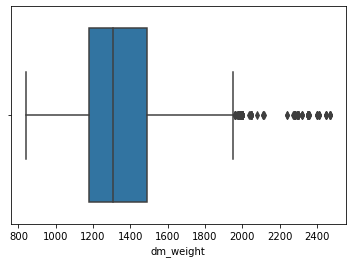

In [294]:
sns.boxplot(df.dm_weight);

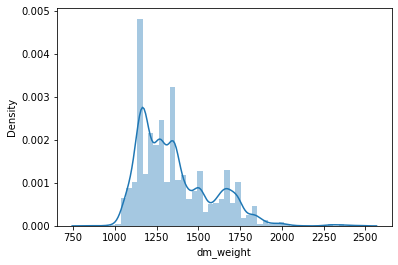

In [295]:
sns.distplot(df.dm_weight);

<div class="alert alert-block alert-info">
<p>Ready for the analysis, but I don't think that this column is useful for the model.</p></div>

### 36 - Drive chain

In [296]:
df['Drive chain'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [297]:
df['dm_drive_chain'] = df['Drive chain']

In [298]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z4]+)', x)
        return y[0]

In [299]:
df['dm_drive_chain'] = df['dm_drive_chain'].apply(convert)

In [300]:
df['dm_drive_chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: dm_drive_chain, dtype: int64

In [301]:
df['dm_drive_chain'].replace({'rear':np.nan}, inplace=True)

In [302]:
df['dm_drive_chain'].value_counts(dropna=False)

front    8886
NaN      6862
4WD       171
Name: dm_drive_chain, dtype: int64

In [303]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
lst3 = df.dm_gear.unique()
for i in lst1:
    for j in lst2:
        for t in lst3:
            cond = (df.make_model == i) & (df.body_type == j) & (df.dm_gear == t)
            df.loc[cond, 'dm_drive_chain'] = df.loc[cond, 'dm_drive_chain'].fillna(method=
                                                                            'ffill').fillna(method='bfill')
for i in lst2:
    for j in lst3:
        cond = (df.body_type == i) & (df.dm_gear == j)
        df.loc[cond, 'dm_drive_chain'] = df.loc[cond, 'dm_drive_chain'].fillna(method=
                                                                            'ffill').fillna(method='bfill')
df.dm_drive_chain = df.dm_drive_chain.fillna(method='ffill').fillna('bfill')

In [304]:
df['dm_drive_chain'].value_counts(dropna=False)

front    15585
4WD        334
Name: dm_drive_chain, dtype: int64

In [305]:
# df_dummied = pd.get_dummies(df.dm_gear, prefix='gear_', prefix_sep='', columns=['gear'], dtype='float64')
# df = pd.concat([df, df_dummied], axis=1)

<div class="alert alert-block alert-success">
<p>Ready for the model.</p></div>

### 37 - Fuel

In [306]:
df.Fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [307]:
df['dm_fuel'] = df.Fuel

In [308]:
def convert(x):
    x = str(x)
    y = re.findall('Regular|Super|Biogas|CNG|Domestic|gas|Others|Electric|Gasoline|LPG|Diesel', x)
    if y != []:
        
        if y[0] in ['Gasoline', 'Super', 'Others', 'Regular', 'Electric']:
            return 'Benzine'
        elif y[0] in ['LPG', 'CNG', 'Biogas', 'Domestic', 'gas']:
            return 'LPG/CNG'
        elif y[0] in ['Diesel']:
            return 'Diesel'

In [309]:
df.dm_fuel = df.dm_fuel.apply(convert)

In [310]:
df.dm_fuel.value_counts(dropna=False)

Benzine    8556
Diesel     7299
LPG/CNG      64
Name: dm_fuel, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 38 - Consumption

In [312]:
df.Consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [375]:
df['dm_consumption'] = df.Consumption

In [376]:
def calc(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9.]+)', x)
        if 'comb' in x and 'city' in x and 'country' in x:
            return [float(y[0]), float(y[2]), float(y[4])]

In [377]:
calculation = df['dm_consumption'].apply(calc)

In [378]:
calculation

0        [3.8, 4.3, 3.5]
1        [5.6, 7.1, 4.7]
2        [3.8, 4.4, 3.4]
3        [3.8, 4.3, 3.5]
4        [4.1, 4.6, 3.8]
              ...       
15914    [5.3, 6.2, 4.7]
15915    [7.4, 9.2, 6.3]
15916    [5.3, 6.2, 4.7]
15917    [5.3, 6.2, 4.7]
15918    [6.8, 8.7, 5.7]
Name: dm_consumption, Length: 15919, dtype: object

In [379]:
comb_sum, city_sum, country_sum = 0,0,0
for i in range(len(calculation)):
    comb_sum += calculation[0][0]
    city_sum += calculation[0][1]
    country_sum += calculation[0][2]
comb_avg = comb_sum / len(calculation)
city_avg = city_sum / len(calculation)
country_avg = country_sum / len(calculation)

city_multiplier = comb_avg / city_avg
country_multiplier = comb_avg / country_avg
print(x, y)

0.8837209302325423 1.0857142857145872


In [380]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9.]+)', x)
        if 'comb' in x:
            return float(y[0])
        elif 'city' in x and 'country' in x:
            return (float(y[0]) + float(y[2])) / 2
        elif 'city' in x:
            return float(y[0]) * city_multiplier
        elif 'county' in x:
            return float(y[0]) * country_multiplier

In [381]:
df['dm_consumption'] = df['dm_consumption'].apply(convert)

In [382]:
df['dm_consumption'].value_counts(dropna=False).sort_index()

0.00        2
1.00        1
1.20        1
1.60        3
3.00       69
3.10        7
3.20       25
3.30      307
3.40      125
3.50      288
3.60       37
3.60      194
3.65       20
3.70      369
3.80      585
3.90      733
3.95        3
4.00      713
4.10      342
4.20      435
4.30      307
4.40      623
4.50      524
4.55        1
4.60      426
4.70      607
4.80      546
4.90      393
5.00      545
5.10      657
5.15       19
5.20      454
5.30      380
5.40      770
5.45        2
5.50      380
5.60      618
5.70      342
5.80      165
5.90      369
6.00      331
6.10      175
6.20      216
6.30      181
6.40       75
6.50       43
6.60      148
6.70       43
6.80      136
6.90       27
7.00       10
7.10       38
7.20        6
7.30        2
7.40       66
7.50        1
7.60       14
7.80        6
7.90        3
8.00        5
8.10        2
8.30       20
8.60        4
8.70        3
9.10        1
10.00      34
11.00       1
13.80       1
32.00       1
33.00       1
38.00       2
40.00 

In [383]:
df.dm_consumption.values[:10]

array([3.8, 5.6, 3.8, 3.8, 4.1, 3.5, 3.7, 3.7, 3.7, nan])

In [384]:
df.dm_consumption.replace(df[df.dm_consumption.values > 10].dm_consumption.values, 10, inplace=True)

In [385]:
df.dm_consumption.replace(df[df.dm_consumption.values < 3].dm_consumption.values, 3, inplace=True)

In [386]:
df['dm_consumption'].value_counts(dropna=False).sort_index()

3.00       76
3.10        7
3.20       25
3.30      307
3.40      125
3.50      288
3.60       37
3.60      194
3.65       20
3.70      369
3.80      585
3.90      733
3.95        3
4.00      713
4.10      342
4.20      435
4.30      307
4.40      623
4.50      524
4.55        1
4.60      426
4.70      607
4.80      546
4.90      393
5.00      545
5.10      657
5.15       19
5.20      454
5.30      380
5.40      770
5.45        2
5.50      380
5.60      618
5.70      342
5.80      165
5.90      369
6.00      331
6.10      175
6.20      216
6.30      181
6.40       75
6.50       43
6.60      148
6.70       43
6.80      136
6.90       27
7.00       10
7.10       38
7.20        6
7.30        2
7.40       66
7.50        1
7.60       14
7.80        6
7.90        3
8.00        5
8.10        2
8.30       20
8.60        4
8.70        3
9.10        1
10.00      51
NaN      1925
Name: dm_consumption, dtype: int64

In [387]:
lst1 = df.dm_hp2.unique()
lst2 = df.dm_displacement.unique()

for i in lst1:
    for j in lst2:
        cond = (df.dm_hp2 == i) & (df.dm_displacement == j)
        df.loc[cond, 'dm_consumption'] = df.loc[cond, 'dm_consumption'].fillna(method='ffill').fillna(method='bfill')
for i in lst2:
    cond = df.dm_displacement == i
    df.loc[cond, 'dm_consumption'] = df.loc[cond, 'dm_consumption'].fillna(method='ffill').fillna(method='bfill')
for i in lst1:
    cond = df.dm_hp2 == i
    df.loc[cond, 'dm_consumption'] = df.loc[cond, 'dm_consumption'].fillna(method='ffill').fillna(method='bfill')

In [388]:
df['dm_consumption'].value_counts(dropna=False).sort_index()

3.00      84
3.10      10
3.20      31
3.30     386
3.40     139
3.50     327
3.60      37
3.60     214
3.65      20
3.70     430
3.80     667
3.90     800
3.95       3
4.00     784
4.10     377
4.20     478
4.30     397
4.40     705
4.50     602
4.55       1
4.60     516
4.70     740
4.80     591
4.90     436
5.00     699
5.10     773
5.15      20
5.20     516
5.30     416
5.40     870
5.45       2
5.50     431
5.60     696
5.70     387
5.80     185
5.90     399
6.00     361
6.10     197
6.20     234
6.30     197
6.40      82
6.50      44
6.60     157
6.70      48
6.80     149
6.90      27
7.00      10
7.10      41
7.20       8
7.30       2
7.40      73
7.50       1
7.60      14
7.80       9
7.90       3
8.00       5
8.10       2
8.30      21
8.60       4
8.70       3
9.10       1
10.00     57
Name: dm_consumption, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 39 - CO2 Emission

In [389]:
df['CO2 Emission'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n193 g CO2/km (comb)\n]         1
[\n171 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]       1
[\n183 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 124, dtype: int64

In [390]:
df['dm_co2'] = df['CO2 Emission']

In [391]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([0-9,]+)', x)
        if y != []:
            if ',' in y[0]:
                return float(''.join(y[0].split(',')))
            else:
                return float(y[0])
        else:
            return np.nan

In [392]:
df.dm_co2 = df.dm_co2.apply(convert)

In [393]:
df['dm_co2'].value_counts(dropna=False).sort_index()

0.0           2
1.0           1
5.0           3
14.0          1
36.0          3
           ... 
12087.0       3
12324.0       1
13983.0       1
14457.0       1
NaN        2436
Name: dm_co2, Length: 123, dtype: int64

<div class="alert alert-block alert-info">
<p>Missing values and outliers should be handled.</p></div>

### 40 - Emission Class

In [394]:
df['Emission Class'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [395]:
df['dm_em_class'] = df['Emission Class']

In [396]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9cd]+|\S+[0-9Pdc])', x)
        if y != []:
            return ''.join(y)
        else:
            return np.nan

In [397]:
df['dm_em_class'] = df['dm_em_class'].apply(convert)

In [398]:
df['dm_em_class'].value_counts(dropna=False)

6          10139
NaN         3628
6d-TEMP     1845
6c           127
5             78
6d            62
4             40
Name: dm_em_class, dtype: int64

<div class="alert alert-block alert-info">
<p>I have to think about this column.</p></div>

### 41 - \nComfort & Convenience\n

In [399]:
df['\nComfort & Convenience\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [400]:
df.rename(columns={'\nComfort & Convenience\n':'Comfort'}, inplace=True)

In [513]:
df['dm_comfort1'] = df['Comfort']

In [514]:
###################

In [515]:
df['dm_comfort1'].values[0]

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system']

In [516]:
df.dm_comfort.isnull().sum()

920

In [517]:
df['dm_comfort1'].str.get_dummies(sep=',')

,'Air suspension','Armrest','Armrest'],'Automatic climate control','Automatic climate control'],'Auxiliary heating','Cruise control','Cruise control'],'Electric Starter','Electric tailgate','Electrical side mirrors','Electrical side mirrors'],'Electrically adjustable seats','Electrically heated windshield','Heads-up display','Heated steering wheel','Hill Holder','Hill Holder'],'Keyless central door lock','Keyless central door lock'],'Leather seats','Leather steering wheel','Leather steering wheel'],'Light sensor','Lumbar support','Lumbar support'],'Massage seats','Multi-function steering wheel','Multi-function steering wheel'],'Navigation system','Navigation system'],'Panorama roof','Panorama roof'],'Park Distance Control','Park Distance Control'],'Parking assist system camera','Parking assist system camera'],'Parking assist system self-steering','Parking assist system self-steering'],'Parking assist system sensors front','Parking assist system sensors front'],'Parking assist system sensors rear','Parking assist system sensors rear'],'Power windows','Power windows'],'Rain sensor','Rain sensor'],'Seat heating','Seat heating'],'Seat ventilation','Seat ventilation'],'Split rear seats','Split rear seats'],'Start-stop system','Start-stop system'],'Sunroof','Sunroof'],'Tinted windows','Tinted windows'],'Wind deflector'],'Windshield'],['Air conditioning',['Air conditioning'],['Air suspension',['Air suspension'],['Armrest',['Auxiliary heating',['Cruise control',['Cruise control'],['Electrical side mirrors',['Electrically adjustable seats',['Electrically heated windshield',['Heads-up display'],['Heated steering wheel',['Hill Holder',['Hill Holder'],['Leather steering wheel',['Light sensor',['Multi-function steering wheel',['Multi-function steering wheel'],['Navigation system',['Navigation system'],['Panorama roof'],['Park Distance Control',['Park Distance Control'],['Power windows',['Power windows'],['Rain sensor'],['Sunroof']
0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15915,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15916,0,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [518]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()

for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_comfort1'] = df.loc[cond, 'dm_comfort1'].fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Mode degeri liste oldugu icin fillna listeyi kabul etmedi. Ancak bu sekilde bir doldurma mumkun. 
# Eger mode degeri ile doldurmak istiyorsam get_dummies yaptiktan sonra olusan tum sutunlarde dolasacak bir
# fonksiyon ile her sutunu istenilen sartlari saglayan mode degeri ile doldurmak mumkun olur.

In [519]:
df['dm_comfort1'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                      227
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                   156
[Air conditioning, Power windows]                                     

In [520]:
df.dm_comfort1.isnull().sum()

0

In [ ]:
####################

In [521]:
df['dm_comfort2'] = df['Comfort']

In [522]:
df['dm_comfort2'] = df['dm_comfort2'].apply(lambda x: len(x) if x is not np.nan else np.nan)

In [523]:
df['dm_comfort2'].values[:100]

array([16.,  9., 13., 16., 13., 17., 15., 10.,  2., nan,  3., 16., 17.,
       11., 16., 11.,  3., 12., 10., 11., 15., 18., 15.,  3., 14.,  5.,
       15.,  5.,  2.,  5., nan,  9.,  5.,  7., 12.,  5.,  8.,  6.,  4.,
       11.,  6., 13., 13., 10.,  8.,  8., 12.,  5.,  9., 11., 12.,  4.,
        5., nan,  7.,  7.,  4., 10.,  6.,  6., 17., 13.,  8., 11.,  8.,
       10., 13.,  8., 11., 16.,  9., 14., 18., 15., 16., 21., 16., 16.,
       18., 16.,  3., 11., 15., 19., 14., 17., 14.,  6., 12., 17., 15.,
       16., 14., 15.,  9.,  1.,  3.,  5.,  9.,  4.])

In [524]:
df['dm_comfort2'].value_counts(dropna=False)

15.0    1070
14.0    1031
16.0     972
17.0     924
NaN      920
13.0     837
11.0     837
12.0     746
6.0      742
10.0     723
4.0      705
5.0      703
7.0      664
18.0     630
8.0      616
3.0      580
9.0      554
19.0     451
20.0     404
21.0     363
2.0      308
22.0     294
23.0     217
1.0      193
24.0     128
25.0     107
26.0      93
27.0      50
28.0      31
29.0      14
31.0       4
30.0       4
32.0       2
33.0       2
Name: dm_comfort2, dtype: int64

In [525]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
lst3 = df.dm_registration.unique()
for i in lst1:
    for j in lst2:
        for k in lst3:
            cond = (df.make_model == i) & (df.body_type == j) & (df.dm_registration == k)
            df.loc[cond, 'dm_comfort2'] = df.loc[cond, 'dm_comfort2'].fillna(method='ffill').fillna(method='bfill')
df.dm_comfort2 = df.dm_comfort2.fillna(method='ffill').fillna(method='bfill')

In [526]:
df['dm_comfort2'].value_counts(dropna=False)

15.0    1125
14.0    1096
16.0     998
17.0     941
13.0     889
11.0     879
6.0      798
12.0     797
10.0     788
5.0      780
4.0      754
7.0      696
8.0      671
18.0     655
3.0      646
9.0      589
19.0     463
20.0     416
21.0     378
2.0      323
22.0     313
23.0     230
1.0      228
24.0     140
25.0     112
26.0     101
27.0      52
28.0      32
29.0      17
31.0       4
30.0       4
32.0       2
33.0       2
Name: dm_comfort2, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 42 - \nEntertainment & Media\n

In [407]:
df.rename(columns={'\nEntertainment & Media\n':'Entertainment'}, inplace=True)

In [408]:
df.Entertainment.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                      1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
                                                                                         ... 
[Bluetooth, MP3, On-board computer, Sound system, USB]                                      1
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]       1
[Bluetooth, Digital radio, On-board computer, Sound system, USB]                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                          1
[CD player, Digital radio, Radio]                           

In [409]:
df['dm_entertainment'] = df.Entertainment

In [410]:
df['dm_entertainment'] = df['dm_entertainment'].apply(lambda x: len(x) if x is not np.nan else np.nan)

In [411]:
df['dm_entertainment'].values[:100]

array([ 4.,  5.,  2.,  8.,  7.,  6.,  7.,  3.,  1., nan,  7.,  5.,  7.,
        3.,  5.,  7.,  3.,  6.,  5.,  6.,  8.,  7.,  8.,  1.,  8.,  2.,
        7.,  1., nan, nan, nan,  6.,  3.,  2.,  7.,  6.,  3.,  1.,  1.,
        6.,  5.,  5.,  5.,  6.,  5.,  5.,  4.,  1.,  2.,  7.,  3., nan,
        2., nan,  3.,  1.,  3.,  3.,  2.,  1.,  8.,  7.,  4.,  2.,  1.,
        2.,  4.,  3.,  6.,  3.,  3.,  6.,  4.,  8.,  3.,  6.,  6.,  5.,
        7.,  5.,  1.,  6.,  6.,  9.,  6.,  7.,  2.,  4.,  6.,  7.,  5.,
        4.,  7.,  5.,  2., nan,  6.,  5.,  8.,  1.])

In [412]:
df.Entertainment.values[:100]

array([list(['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio']),
       list(['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'Sound system']),
       list(['MP3', 'On-board computer']),
       list(['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'Sound system', 'USB']),
       list(['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']),
       list(['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'Sound system', 'USB']),
       list(['Bluetooth', 'CD player', 'Hands-free equipment', 'On-board computer', 'Radio', 'Sound system', 'USB']),
       list(['CD player', 'MP3', 'Radio']), list(['Radio']), nan,
       list(['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']),
       list(['CD player', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']),
       list(['Bluetooth', 'CD player', 'Hands-free equip

In [413]:
df['dm_entertainment'].value_counts(dropna=False)

5.0     3017
6.0     3000
4.0     1733
7.0     1714
2.0     1554
3.0     1424
NaN     1374
1.0     1176
8.0      736
9.0      181
10.0      10
Name: dm_entertainment, dtype: int64

In [414]:
lst1 = df.make_model.unique()
lst2 = df.dm_comfort.unique()
lst3 = df.dm_registration.unique()
for i in lst1:
    for j in lst2:
        for k in lst3:
            cond = (df.make_model == i) & (df.dm_comfort == j) & (df.dm_registration == k)
            df.loc[cond, 'dm_entertainment'] = df.loc[cond, 'dm_entertainment'].fillna(method
                                                                        ='ffill').fillna(method='bfill')
df.dm_entertainment = df.dm_entertainment.fillna(method='ffill').fillna(method='bfill')

In [415]:
df['dm_entertainment'].value_counts(dropna=False)

5.0     3228
6.0     3185
4.0     1920
7.0     1830
2.0     1750
3.0     1603
1.0     1434
8.0      762
9.0      197
10.0      10
Name: dm_entertainment, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 43 - \nExtras\n

In [416]:
df.rename(columns={'\nExtras\n':'Extras'}, inplace=True)

In [417]:
df.Extras.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                         3245
NaN                                                                                                    2962
[Alloy wheels, Touch screen]                                                                            697
[Alloy wheels, Voice Control]                                                                           577
[Alloy wheels, Touch screen, Voice Control]                                                             541
                                                                                                       ... 
[Alloy wheels, Sport suspension, Touch screen, Trailer hitch, Voice Control]                              1
[Alloy wheels, Catalytic Converter, Handicapped enabled, Touch screen, Voice Control, Winter tyres]       1
[Ski bag, Sport suspension]                                                                               1
[Alloy wheels, Sport package

In [418]:
df['dm_extras'] = df.Extras

In [419]:
df['dm_extras'] = df['dm_extras'].apply(lambda x: len(x) if x is not np.nan else np.nan)

In [420]:
df['dm_extras'].values[:100]

array([ 3.,  4.,  2.,  3.,  4.,  4.,  4.,  1.,  1., nan,  2.,  2.,  6.,
        3.,  3.,  1.,  3.,  2.,  1.,  4.,  4.,  3.,  5.,  1.,  2.,  2.,
        2.,  1.,  1.,  1., nan,  2.,  2.,  1.,  1.,  1., nan,  1.,  3.,
        2.,  1.,  1.,  1.,  1., nan,  2.,  1.,  1.,  3.,  3.,  2., nan,
        3., nan,  1.,  1., nan,  1.,  3.,  1.,  3.,  3.,  3.,  1., nan,
        1.,  2.,  1.,  6.,  3.,  3.,  3.,  4.,  4.,  2.,  4.,  3.,  4.,
        5.,  3.,  1.,  4.,  4.,  4.,  1.,  5.,  1.,  2.,  4.,  6.,  2.,
        2.,  4.,  3.,  1., nan, nan,  1.,  5.,  2.])

In [421]:
df.Extras.values[:100]

array([list(['Alloy wheels', 'Catalytic Converter', 'Voice Control']),
       list(['Alloy wheels', 'Sport seats', 'Sport suspension', 'Voice Control']),
       list(['Alloy wheels', 'Voice Control']),
       list(['Alloy wheels', 'Sport seats', 'Voice Control']),
       list(['Alloy wheels', 'Sport package', 'Sport suspension', 'Voice Control']),
       list(['Alloy wheels', 'Sport package', 'Sport seats', 'Sport suspension']),
       list(['Alloy wheels', 'Sport package', 'Sport seats', 'Sport suspension']),
       list(['Alloy wheels']), list(['Alloy wheels']), nan,
       list(['Alloy wheels', 'Shift paddles']),
       list(['Alloy wheels', 'Sport seats']),
       list(['Alloy wheels', 'Catalytic Converter', 'Sport package', 'Sport seats', 'Sport suspension', 'Voice Control']),
       list(['Alloy wheels', 'Sport seats', 'Sport suspension']),
       list(['Alloy wheels', 'Sport seats', 'Sport suspension']),
       list(['Alloy wheels']),
       list(['Alloy wheels', 'Sport package'

In [422]:
df['dm_extras'].value_counts(dropna=False)

1.0     4214
2.0     3238
NaN     2962
3.0     2681
4.0     1405
5.0      743
6.0      410
7.0      175
8.0       60
9.0       24
10.0       7
Name: dm_extras, dtype: int64

In [423]:
lst1 = df.make_model.unique()
lst2 = df.dm_comfort.unique()
lst3 = df.dm_entertainment.unique()
for i in lst1:
    for j in lst2:
        for k in lst3:
            cond = (df.make_model == i) & (df.dm_comfort == j) & (df.dm_entertainment == k)
            df.loc[cond, 'dm_extras'] = df.loc[cond, 'dm_extras'].fillna(method='ffill').fillna(method='bfill')
df.dm_extras = df.dm_extras.fillna(method='ffill').fillna(method='bfill')

In [424]:
df['dm_extras'].value_counts(dropna=False)

1.0     6161
2.0     3789
3.0     2966
4.0     1521
5.0      772
6.0      436
7.0      181
8.0       61
9.0       24
10.0       8
Name: dm_extras, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 44 - \nSafety & Security\n

In [425]:
df.rename(columns={'\nSafety & Security\n':'Safety'}, inplace=True)

In [426]:
df['dm_safety'] = df.Safety

In [427]:
df['dm_safety'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                        982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                 538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]            

In [428]:
df['dm_safety'] = df['dm_safety'].apply(lambda x: len(x) if x is not np.nan else np.nan)

In [429]:
df['dm_safety'].values[:100]

array([14., 15., 12., 14., 13., 14., 13., 12.,  9., nan, 13., 13., 14.,
       13., 14., 12.,  8., 12., 12., 12., 20., 16., 16.,  9., 17., 14.,
       13., 14.,  5., 11., nan, 13., 12., 14., 13., 12., 12., 13., 13.,
        9., 12., 13., 13.,  9., 12., 12., 10., 13., 11., 13., 10., 12.,
       14., nan, 12., 10., 11., 12., 14., 13., 17., 14., 12., 14., 12.,
       11.,  9.,  6., 15.,  9., 11., 13., 15., 15., 12., 15., 11., 14.,
       13., 13.,  9., 12., 11., 15., 13., 15., 11., 10., 14., 13., 13.,
       10., 11., 14., 11.,  7., 13., 12., 14., 13.])

In [430]:
df['dm_safety'].value_counts(dropna=False)

13.0    2154
12.0    1732
14.0    1492
11.0    1375
10.0    1046
15.0     987
NaN      982
16.0     846
9.0      837
17.0     573
8.0      573
18.0     530
19.0     513
7.0      469
20.0     414
6.0      318
21.0     240
5.0      212
22.0     118
4.0      110
3.0      102
2.0       86
1.0       80
23.0      46
24.0      38
25.0      16
28.0      10
26.0      10
27.0       9
29.0       1
Name: dm_safety, dtype: int64

In [431]:
lst1 = df.make_model.unique()
lst2 = df.dm_comfort.unique()
lst3 = df.dm_entertainment.unique()
for i in lst1:
    for j in lst2:
        for k in lst3:
            cond = (df.make_model == i) & (df.dm_comfort == j) & (df.dm_entertainment == k)
            df.loc[cond, 'dm_safety'] = df.loc[cond, 'dm_safety'].fillna(method='ffill').fillna(method='bfill')
df.dm_safety = df.dm_safety.fillna(method='ffill').fillna(method='bfill')

In [432]:
df['dm_safety'].value_counts(dropna=False)

13.0    2260
12.0    1832
14.0    1555
11.0    1495
10.0    1155
15.0    1034
9.0      918
16.0     900
8.0      619
17.0     593
18.0     556
19.0     535
7.0      513
20.0     436
6.0      349
21.0     267
5.0      234
22.0     120
4.0      117
3.0      107
1.0       96
2.0       95
23.0      47
24.0      39
25.0      16
28.0      10
26.0      10
27.0      10
29.0       1
Name: dm_safety, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the model.</p></div>

### 45 - description

In [433]:
# df.description.value_counts(dropna=False)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 46 - Emission Label

In [434]:
df['Emission Label'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [435]:
df['dm_em_label'] = df['Emission Label']

In [436]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('\(([A-Za-z\s]+)', x)
        if y != []:
            return y[0]
        else:
            return np.nan

In [437]:
df.dm_em_label = df.dm_em_label.apply(convert)

In [438]:
df['dm_em_label'].value_counts(dropna=False)

NaN           11974
Green          3553
No sticker      381
Blue              8
Yellow            2
Red               1
Name: dm_em_label, dtype: int64

<div class="alert alert-block alert-info">
<p>Too many null values. I have to think about how to fill in the missing values.</p></div>

### 47 - Gears

In [439]:
df.Gears.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [440]:
df['dm_gears'] = df.Gears

In [441]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)', x)
        return float(y[0])

In [442]:
df.dm_gears = df.dm_gears.apply(convert)

In [443]:
df.dm_gears.value_counts(dropna=False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
3.0        2
1.0        2
50.0       1
2.0        1
Name: dm_gears, dtype: int64

In [444]:
df.dm_gears.replace({9:np.nan,4:np.nan,3:np.nan,1:np.nan,50:5,2:np.nan}, inplace=True)

In [445]:
df.dm_gears.value_counts(dropna=False)

6.0    5822
NaN    4725
5.0    3240
7.0    1908
8.0     224
Name: dm_gears, dtype: int64

In [446]:
lst1 = df.make_model.unique()
lst2 = df.body_type.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == i) & (df.body_type == j)
        df.loc[cond, 'dm_gears'] = df.loc[cond, 
                                'dm_gears'].fillna(method='ffill').fillna(method='bfill')
df.dm_gears = df.dm_gears.fillna(method='ffill').fillna(method='bfill')

In [447]:
df.dm_gears.value_counts(dropna=False)

6.0    8373
5.0    4401
7.0    2856
8.0     289
Name: dm_gears, dtype: int64

<div class="alert alert-block alert-success">
<p>Ready for the analysis.</p></div>

### 48 - Country version

In [448]:
df['Country version'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [449]:
df['dm_country'] = df['Country version']

In [450]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z]+)', x)
        return y[0]

In [451]:
df.dm_country = df.dm_country.apply(convert)

In [452]:
df.dm_country.value_counts(dropna=False)

NaN            8333
Germany        4502
Italy          1038
European        507
Netherlands     464
Spain           325
Belgium         314
Austria         208
Czech            52
Poland           49
France           38
Denmark          33
Hungary          28
Japan             8
Croatia           4
Slovakia          4
Sweden            3
Bulgaria          2
Romania           2
Serbia            1
Egypt             1
Switzerland       1
Luxembourg        1
Slovenia          1
Name: dm_country, dtype: int64

<div class="alert alert-block alert-info">
<p>Consider how to fill in the missing values.</p></div>

### 49 - Electricity consumption

In [453]:
df['Electricity consumption'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: Electricity consumption, dtype: int64

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 50 - Last Service Date

In [454]:
df['Last Service Date'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n03/2019\n, \n129 g CO2/km (comb)\n]        1
\n05/2018\n                                   1
[\n04/2018\n, \n110 g CO2/km (comb)\n]        1
[\n04/2018\n, \n123 g CO2/km (comb)\n]        1
[\n05/2019\n, \n93 g CO2/km (comb)\n]         1
Name: Last Service Date, Length: 267, dtype: int64

In [455]:
df['dm_service_date'] = df['Last Service Date']

In [456]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('([0-9]+)/([0-9]+)', x)
        return y[0]

In [457]:
df['dm_service_date'] = df['dm_service_date'].apply(convert)

In [458]:
df['dm_service_date'].value_counts(dropna=False)

NaN           15353
(05, 2019)       61
(02, 2019)       55
(01, 2019)       51
(06, 2019)       49
(04, 2019)       48
(03, 2019)       47
(12, 2018)       32
(10, 2018)       24
(05, 2018)       21
(06, 2018)       21
(07, 2018)       21
(01, 2018)       20
(11, 2018)       17
(09, 2018)       17
(04, 2018)       16
(08, 2018)       13
(03, 2018)        9
(06, 2017)        7
(02, 2018)        5
(02, 2017)        3
(01, 2017)        3
(05, 2017)        3
(10, 2017)        3
(12, 2017)        3
(11, 2017)        2
(04, 2016)        2
(07, 2017)        2
(06, 2016)        2
(07, 2019)        1
(09, 2017)        1
(10, 2019)        1
(05, 2016)        1
(11, 2019)        1
(09, 2019)        1
(04, 2017)        1
(08, 2019)        1
(03, 2016)        1
Name: dm_service_date, dtype: int64

In [459]:
df['dm_service_date'].isnull().sum() / len(df)

0.9644450028268108

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 51 - Other Fuel Types

In [460]:
df['Other Fuel Types'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN             15039
[[], [], []]      880
Name: Other Fuel Types, dtype: int64

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 52 - Availability

In [461]:
df['Availability'].value_counts(dropna=False)

NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 5 days from ordering\n         35
\nin 3 days from ordering\n         35
\nin 14 days from ordering\n        24
\nin 180 days from ordering\n       24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: Availability, dtype: int64

In [462]:
df['Availability'].isnull().sum() / len(df)

0.9601105597085244

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 53 - Last Timing Belt Service Date

In [463]:
df['Last Timing Belt Service Date'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15903
[\n04/2016\n]                    2
[\n12/1900\n]                    1
[\n01/1970\n]                    1
[\n04/2019\n]                    1
[\n01/2018\n]                    1
[\n06/2019\n]                    1
[\n02/2018\n]                    1
[\n02/2019\n]                    1
[\n01/2019\n]                    1
[\n06/2017\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n09/2018\n]                    1
[\n05/2019\n]                    1
[\n01/1900\n]                    1
[\n07/2018\n]                    1
Name: Last Timing Belt Service Date, dtype: int64

In [464]:
df['Last Timing Belt Service Date'].isnull().sum() / len(df)

0.9989949117406872

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

### 54 - Available from

In [465]:
df['Available from'].value_counts(dropna=False)

NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n10/11/19\n        5
\n26/06/19\n        5
\n27/06/19\n        5
\n08/07/19\n        4
\n01/08/19\n        3
\n25/10/19\n        3
\n15/07/19\n        3
\n05/07/19\n        2
\n16/07/19\n        2
\n24/08/19\n        2
\n04/07/19\n        2
\n20/07/19\n        2
\n05/08/19\n        2
\n30/06/19\n        2
\n14/09/19\n        1
\n03/12/19\n        1
\n29/07/19\n        1
\n27/07/19\n        1
\n18/07/19\n        1
\n29/09/19\n        1
\n10/07/19\n        1
\n06/12/19\n        1
\n10/10/19\n        1
\n30/09/19\n        1
\n24/07/19\n        1
\n01/09/19\n        1
\n03/08/19\n        1
\n05/12/19\n        1
\n19/07/19\n        1
\n18/08/19\n        1
\n02/07/19\n        1
\n16/08/19\n        1
\n24/09/19\n        1
\n31/10/19\n        1
\n10/12/19\n        1
\n11/08/19

In [466]:
df['Available from'].isnull().sum() / len(df)

0.982913499591683

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## Import Libraries and Data

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)